<a href="https://colab.research.google.com/github/Esotash/CRM-LEAD-ANALYSIS/blob/main/CRM_lead_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

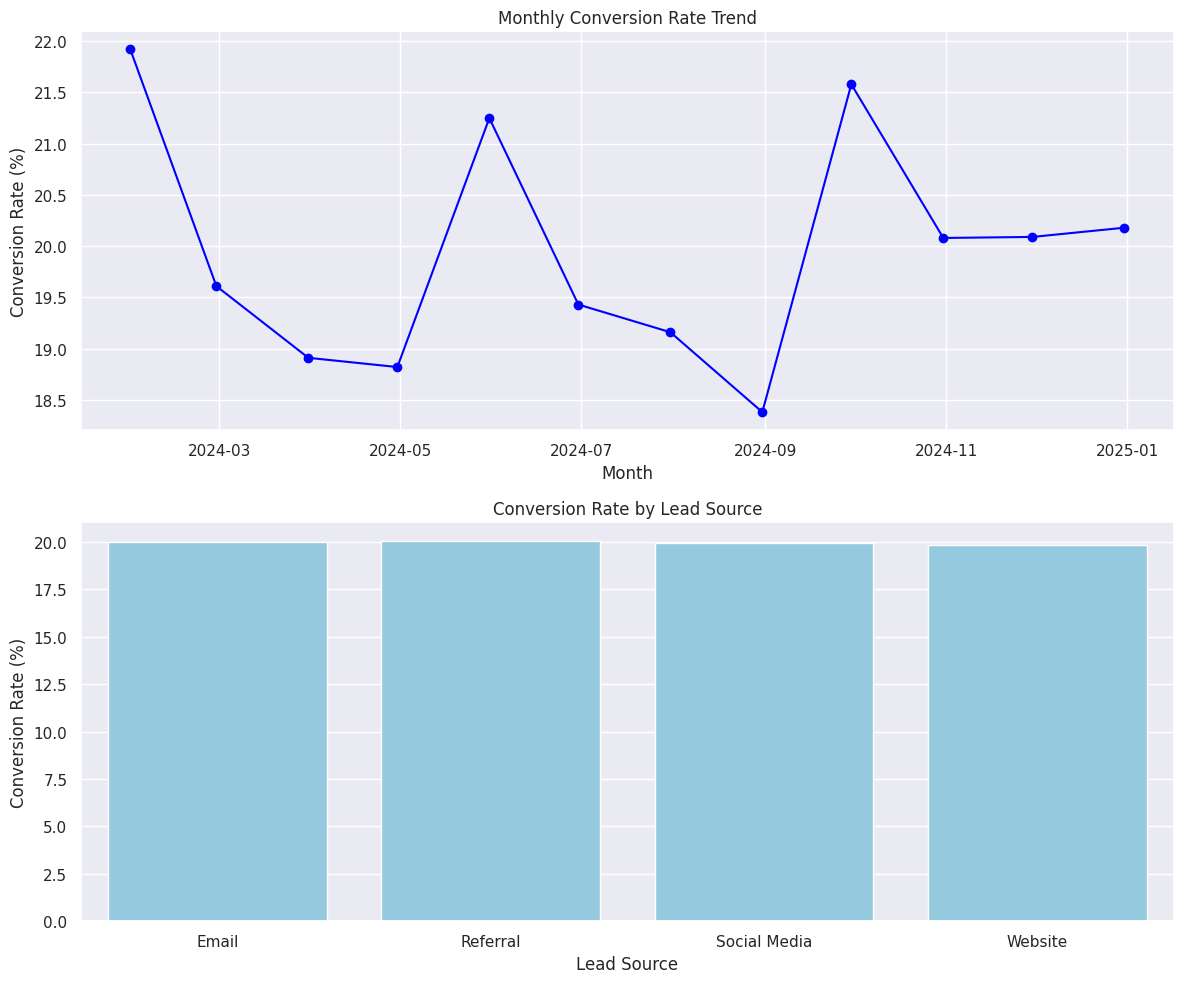


Summary Statistics:
--------------------------------------------------
Overall Conversion Rate: 19.73%
Best Performing Month: January 2024
Best Performing Source: Referral

Overall Trend: Performance is declining


In [ ]:
# First, make sure to install required packages if not already installed
# !pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set the plotting style
plt.style.use('default')  # Using default style instead of seaborn
sns.set_theme()  # This will apply seaborn styling

# Generate sample lead conversion data
np.random.seed(42)
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')
data = {
    'date': dates,
    'total_leads': np.random.randint(50, 150, len(dates)),
    'source': np.random.choice(['Social Media', 'Email', 'Website', 'Referral'], len(dates)),
}
df = pd.DataFrame(data)

# Add conversion data with some realistic patterns
df['converted_leads'] = (df['total_leads'] * np.random.uniform(0.1, 0.3, len(df))).astype(int)
df['conversion_rate'] = (df['converted_leads'] / df['total_leads'] * 100).round(2)

# Monthly aggregation (using 'ME' instead of 'M' to address the warning)
monthly_data = df.set_index('date').resample('ME').agg({
    'total_leads': 'sum',
    'converted_leads': 'sum'
})
monthly_data['conversion_rate'] = (monthly_data['converted_leads'] / monthly_data['total_leads'] * 100).round(2)

# Source-wise analysis
source_performance = df.groupby('source').agg({
    'total_leads': 'sum',
    'converted_leads': 'sum'
}).reset_index()
source_performance['conversion_rate'] = (source_performance['converted_leads'] / source_performance['total_leads'] * 100).round(2)

# Create visualizations
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Monthly Conversion Trend
axes[0].plot(monthly_data.index, monthly_data['conversion_rate'], marker='o', color='blue')
axes[0].set_title('Monthly Conversion Rate Trend')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Conversion Rate (%)')
axes[0].grid(True)

# Source-wise Performance
sns.barplot(data=source_performance, x='source', y='conversion_rate', ax=axes[1], color='skyblue')
axes[1].set_title('Conversion Rate by Lead Source')
axes[1].set_xlabel('Lead Source')
axes[1].set_ylabel('Conversion Rate (%)')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics:")
print("-" * 50)
print(f"Overall Conversion Rate: {df['conversion_rate'].mean():.2f}%")
print(f"Best Performing Month: {monthly_data['conversion_rate'].idxmax().strftime('%B %Y')}")
print(f"Best Performing Source: {source_performance.loc[source_performance['conversion_rate'].idxmax(), 'source']}")

# Trend analysis
trend = np.polyfit(range(len(monthly_data)), monthly_data['conversion_rate'], 1)[0]
trend_direction = "improving" if trend > 0 else "declining"
print(f"\nOverall Trend: Performance is {trend_direction}")

<ipython-input-5-a9722114e3db>:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_conv = df.groupby('Income_Category').agg({


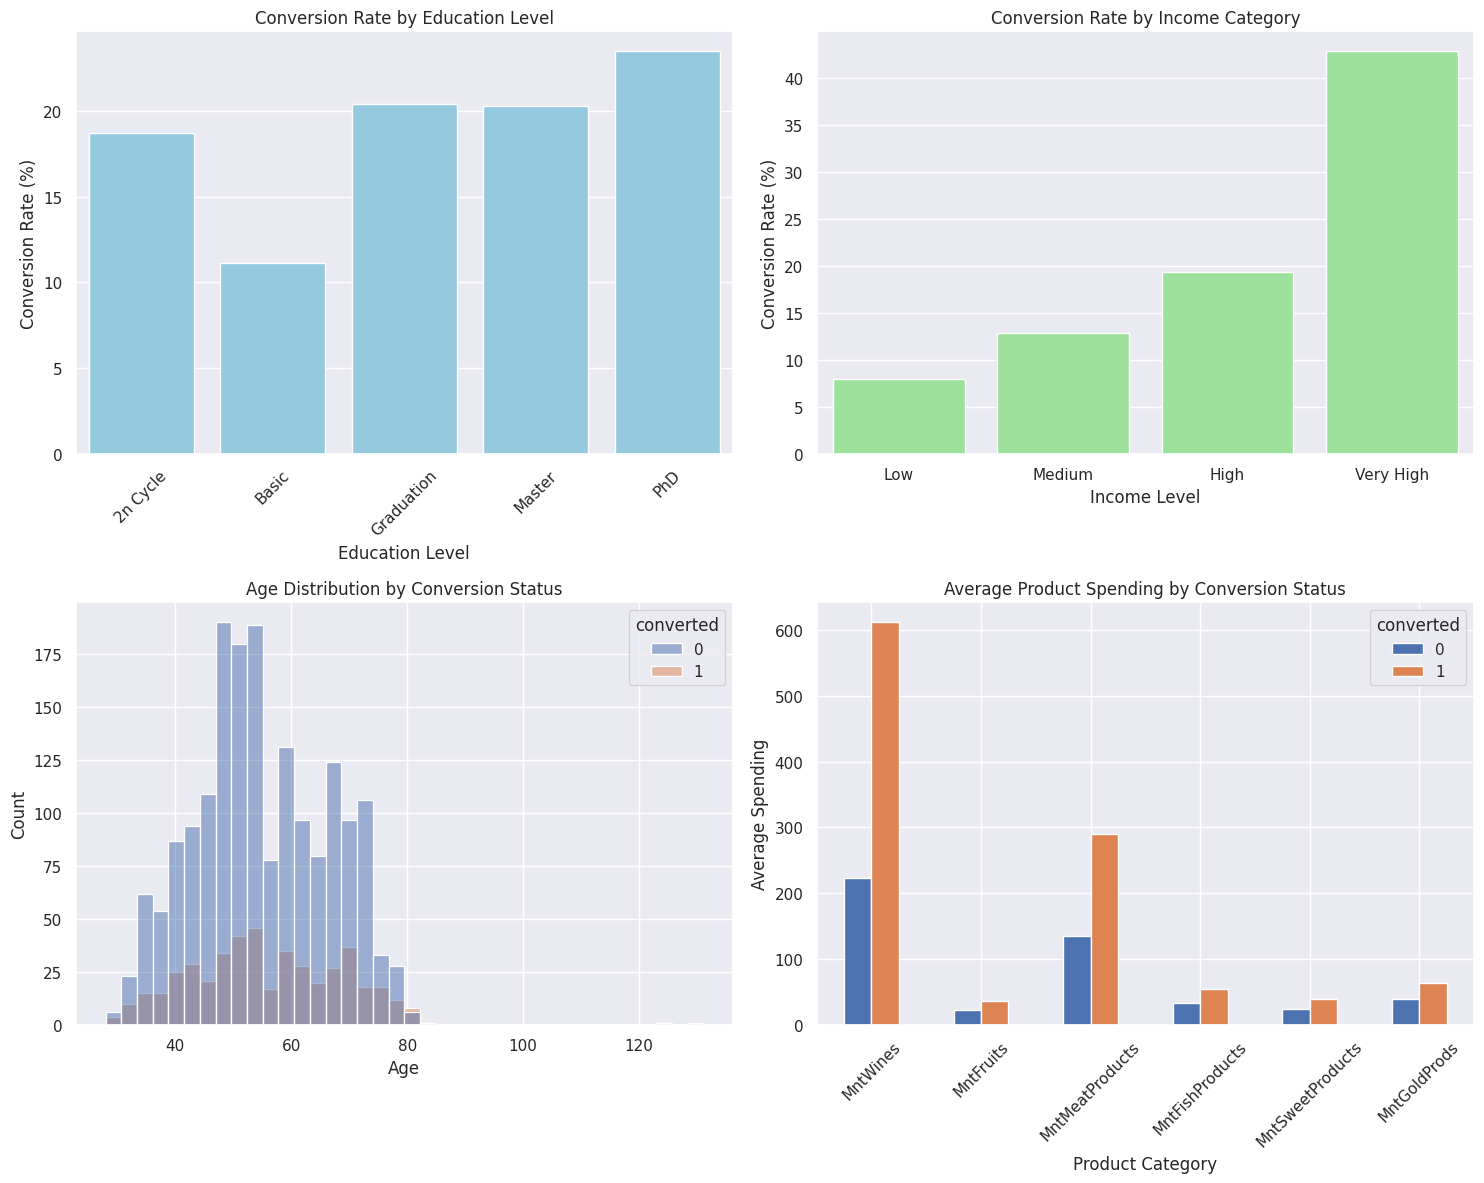


Campaign Performance Summary:
--------------------------------------------------
Overall Conversion Rate: 20.67%
Total Customers: 2240
Total Converted Customers: 463

Conversion Rate by Education:
2n Cycle: 18.72%
Basic: 11.11%
Graduation: 20.41%
Master: 20.27%
PhD: 23.46%

Conversion Rate by Income Category:
Low: 7.94%
Medium: 12.82%
High: 19.31%
Very High: 42.78%

Customer Behavior Insights:
--------------------------------------------------
Average Age of Converted Customers: 55.9 years
Average Age of Non-Converted Customers: 55.0 years
Average Total Spending of Converted Customers: $1097.04
Average Total Spending of Non-Converted Customers: $477.81
Average Web Visits for Converted Customers: 4.7
Average Web Visits for Non-Converted Customers: 5.5


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch and examine the data with correct separator
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/marketing_campaign.csv"
df = pd.read_csv(url, sep=';')

# Basic data preprocessing
df['Age'] = 2024 - df['Year_Birth']

# Calculate campaign acceptance
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['total_accepted_campaigns'] = df[campaign_cols].sum(axis=1)
df['converted'] = (df['total_accepted_campaigns'] > 0).astype(int)

# Education-wise conversion analysis
education_conv = df.groupby('Education').agg({
    'converted': ['count', 'sum']
}).reset_index()
education_conv.columns = ['Education', 'total_customers', 'conversions']
education_conv['conversion_rate'] = (education_conv['conversions'] / education_conv['total_customers'] * 100).round(2)

# Income analysis
df['Income_Category'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
income_conv = df.groupby('Income_Category').agg({
    'converted': ['count', 'sum']
}).reset_index()
income_conv.columns = ['Income_Category', 'total_customers', 'conversions']
income_conv['conversion_rate'] = (income_conv['conversions'] / income_conv['total_customers'] * 100).round(2)

# Product spending analysis
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['total_spending'] = df[product_cols].sum(axis=1)

# Create visualizations
plt.style.use('default')
sns.set_theme()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Education-wise Performance
sns.barplot(data=education_conv, x='Education', y='conversion_rate', ax=axes[0,0], color='skyblue')
axes[0,0].set_title('Conversion Rate by Education Level')
axes[0,0].set_xlabel('Education Level')
axes[0,0].set_ylabel('Conversion Rate (%)')
axes[0,0].tick_params(axis='x', rotation=45)

# Income-wise Performance
sns.barplot(data=income_conv, x='Income_Category', y='conversion_rate', ax=axes[0,1], color='lightgreen')
axes[0,1].set_title('Conversion Rate by Income Category')
axes[0,1].set_xlabel('Income Level')
axes[0,1].set_ylabel('Conversion Rate (%)')

# Age Distribution
sns.histplot(data=df, x='Age', hue='converted', multiple="layer", ax=axes[1,0])
axes[1,0].set_title('Age Distribution by Conversion Status')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Count')

# Product Spending by Conversion
avg_spending = df.groupby('converted')[product_cols].mean()
avg_spending.T.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Average Product Spending by Conversion Status')
axes[1,1].set_xlabel('Product Category')
axes[1,1].set_ylabel('Average Spending')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nCampaign Performance Summary:")
print("-" * 50)
print(f"Overall Conversion Rate: {(df['converted'].mean() * 100):.2f}%")
print(f"Total Customers: {len(df)}")
print(f"Total Converted Customers: {df['converted'].sum()}")

print(f"\nConversion Rate by Education:")
for edu in education_conv.itertuples():
    print(f"{edu.Education}: {edu.conversion_rate:.2f}%")

print(f"\nConversion Rate by Income Category:")
for inc in income_conv.itertuples():
    print(f"{inc.Income_Category}: {inc.conversion_rate:.2f}%")

# Additional insights
print("\nCustomer Behavior Insights:")
print("-" * 50)
print(f"Average Age of Converted Customers: {df[df['converted']==1]['Age'].mean():.1f} years")
print(f"Average Age of Non-Converted Customers: {df[df['converted']==0]['Age'].mean():.1f} years")
print(f"Average Total Spending of Converted Customers: ${df[df['converted']==1]['total_spending'].mean():.2f}")
print(f"Average Total Spending of Non-Converted Customers: ${df[df['converted']==0]['total_spending'].mean():.2f}")
print(f"Average Web Visits for Converted Customers: {df[df['converted']==1]['NumWebVisitsMonth'].mean():.1f}")
print(f"Average Web Visits for Non-Converted Customers: {df[df['converted']==0]['NumWebVisitsMonth'].mean():.1f}")